# LGM DATASCIENCE INTERNSHIP By Abinandan.V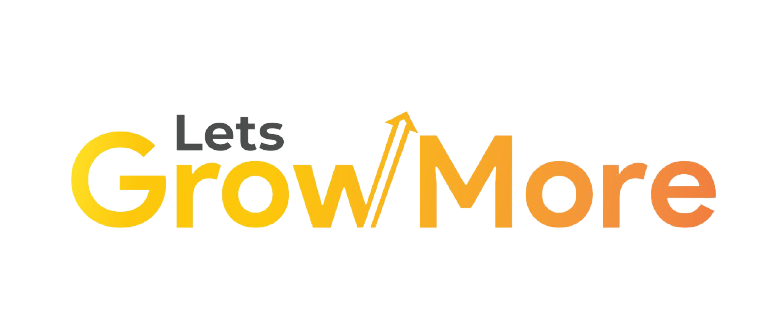

# BEGINNER LEVEL TASK-2 STOCK PREDICTION USING LSTM

# IMPORTING NECESSARY LIBRARIES

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
data = pd.read_csv(path)

In [3]:
data.sample(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2020,2010-08-10,112.90,114.30,111.55,112.05,112.30,327364,368.92
38,2018-08-01,248.70,254.95,234.35,235.10,235.65,13272609,32325.56
1345,2013-04-22,139.00,141.20,137.00,140.70,140.55,2041646,2846.06
35,2018-08-06,235.15,240.45,234.15,240.00,239.50,2560616,6080.87
1123,2014-03-11,143.80,146.00,143.00,146.00,145.15,2110986,3045.88
352,2017-05-02,154.30,161.45,153.75,157.50,157.70,6827849,10835.58
708,2015-11-19,129.60,131.40,129.25,131.25,130.90,488288,637.58
790,2015-07-21,140.10,141.90,136.90,137.25,137.50,1965237,2742.65
1970,2010-10-20,129.25,130.75,128.50,129.20,129.35,749862,972.64
1207,2013-11-08,160.20,163.00,157.80,160.20,160.10,1175152,1883.24


# DATA ANALYSIS AND VISUALIZATION

In [4]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data['Year'] = data['Date'].dt.year

<AxesSubplot:xlabel='Date', ylabel='count'>

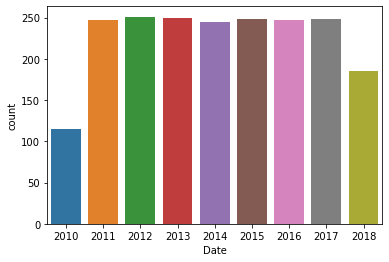

In [7]:
import seaborn as sns
sns.countplot(x=data['Date'].dt.year,data=data)

In [8]:
df = pd.DataFrame()
df['Total'] = data.groupby('Year').sum().sort_values(by='Year')['Turnover (Lacs)']
df['Year'] = data['Year'].sort_values(ascending=True).unique()
df

,Total,Year
Year,,
2010,173424.35,2010
2011,304230.86,2011
2012,839304.24,2012
2013,906908.50,2013
2014,1018418.44,2014
2015,575115.45,2015
2016,599627.49,2016
2017,1871250.47,2017
2018,1648180.65,2018


<AxesSubplot:xlabel='Year', ylabel='Total'>

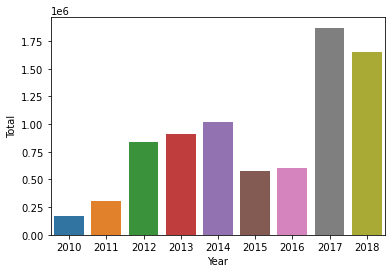

In [9]:
sns.barplot(x='Year',y='Total',data=df)


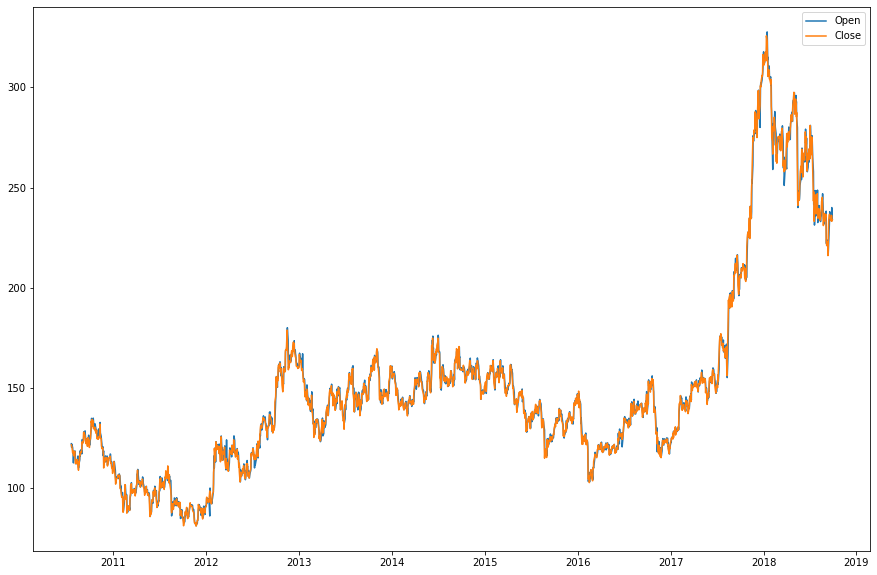

In [10]:
plt.figure(figsize = (15,10))
plt.plot(data['Date'], data['Open'], label='Open')
plt.plot(data['Date'], data['Close'], label='Close')
plt.legend()

# DATA PREPROCESSING

In [14]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Year
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,2018
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,2018
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,2018
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,2018
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,2018
...,...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98,2010
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01,2010
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31,2010
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17,2010


In [15]:
2035*0.8

1628.0

In [43]:
train = data.iloc[:1628, 1:3].values
test = data.iloc[1628:,1:3].values
train.shape

(1628, 2)

In [46]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train)
test_scaled = sc.fit_transform(test)


In [47]:
X_train = []
y_train = []
X_test = []
y_test = []
for i in range(60, 1628):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
for i in range(60,407):
    X_test.append(test_scaled[i-60:i, 0])
    y_test.append(test_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

print(X_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

(1568, 60)


In [48]:
X_train_3D.shape

(1568, 60, 1)

In [49]:
y_train.shape

(1568,)

In [36]:
X_test_3D.shape

(347, 60, 1)

In [34]:
y_test.shape

(347,)

# MODEL CREATION

In [50]:
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.layers import Dense
from keras.layers import LSTM

In [51]:
model = Sequential([ LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)),
                    layers.Dropout(0.2),
                     
                    LSTM(units = 50, return_sequences = True),
                    layers.Dropout(0.2),
                   
                    LSTM(units = 50, return_sequences = True),
                    layers.Dropout(0.2),
                   
                    LSTM(units = 50, return_sequences = True),
                    layers.Dropout(0.2),
                   
                    Dense(units=1)
])

In [52]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics = ['mean_squared_error'])

In [53]:
model.fit(X_train_3D,y_train,epochs=5,batch_size=32)

Epoch 1/5
49/49 [==============================] - 5s 45ms/step - loss: 0.0224 - mean_squared_error: 0.0224 0s - loss: 0.0237 - mean_squared_err
Epoch 2/5
49/49 [==============================] - 2s 46ms/step - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 3/5
49/49 [==============================] - 2s 46ms/step - loss: 0.0114 - mean_squared_error: 0.0114 0s - loss: 0.0118 - mean_squared_error
Epoch 4/5
49/49 [==============================] - 2s 46ms/step - loss: 0.0103 - mean_squared_error: 0.0103 0s - loss: 0.0105 - mean_squ
Epoch 5/5
49/49 [==============================] - 2s 46ms/step - loss: 0.0099 - mean_squared_error: 0.0099


In [54]:
y_pred = model.predict(X_test)

# EVALUATION

In [55]:
import keras.backend as K

def soft_acc(y_test, y_pred):
      return K.mean(K.equal(K.round(y_test), K.round(y_pred)))

model.compile(optimizer='adam',loss='mean_squared_error', metrics=[soft_acc])

In [56]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('loss') < 0.0050):   
                print("Model Reached Maximum Accuracy with less loss!")
                self.model.stop_training = True

In [57]:
callbacks2 = myCallback()

In [59]:
history = model.fit(X_train,y_train,epochs=5,batch_size=32,callbacks=[callbacks2],validation_data=(X_test,y_test))

Epoch 1/5
49/49 [==============================] - 3s 70ms/step - loss: 0.0075 - soft_acc: 0.9732 - val_loss: 0.0394 - val_soft_acc: 0.8664
Epoch 2/5
49/49 [==============================] - 3s 51ms/step - loss: 0.0074 - soft_acc: 0.9726 - val_loss: 0.0370 - val_soft_acc: 0.8768
Epoch 3/5
49/49 [==============================] - 3s 56ms/step - loss: 0.0071 - soft_acc: 0.9725 - val_loss: 0.0386 - val_soft_acc: 0.8721
Epoch 4/5
49/49 [==============================] - 2s 51ms/step - loss: 0.0070 - soft_acc: 0.9747 - val_loss: 0.0380 - val_soft_acc: 0.8754
Epoch 5/5
49/49 [==============================] - 3s 52ms/step - loss: 0.0067 - soft_acc: 0.9759 - val_loss: 0.0371 - val_soft_acc: 0.8744


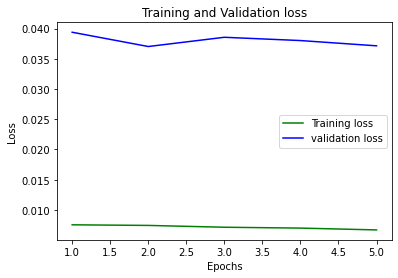

In [73]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

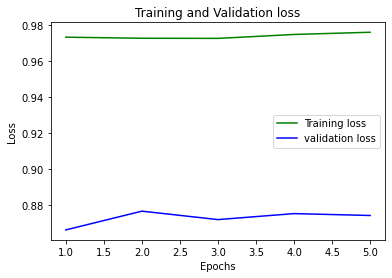

In [74]:
acc_train = history.history['soft_acc']
acc_val = history.history['val_soft_acc']
epochs = range(1,6)
plt.plot(epochs, acc_train, 'g', label='Training loss')
plt.plot(epochs, acc_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# CONCLUSION

This proves that using this Keras model with Stacked LSTM Layers Combined with Dropouts can provide us with 98% training accuracy 
and 89% test set accuracy which is pretty good for a Stock Prediction model.